# Decision Tree Regression

In [16]:
# import packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [15]:
# import data
df = pd.read_csv("hdb_model_data.csv")
df.head()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
0,0.0625,0.114583,0.0,0.0,0.229833,0.242702,0.377101,1.0,0.113027
1,0.3750,0.098958,0.0,0.0,0.888889,0.181339,0.376605,1.0,0.339299
2,0.0000,0.114583,0.0,0.0,0.243531,0.153615,0.373691,1.0,0.077851
3,0.0625,0.114583,0.0,0.0,0.223744,0.212727,0.381423,1.0,0.128102
4,0.1250,0.088542,0.0,0.0,0.292237,0.247779,0.408523,1.0,0.084059


In [4]:
df.shape

(77834, 9)

In [5]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [6]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [7]:
# Decision Tree Regressor

#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor

#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(max_depth = 15,
                                  max_features = 8,
                                  min_samples_split = 2,
                                  random_state=0)

# Fit the regressor object to the dataset.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, max_features=8, random_state=0)

In [8]:
# predictions
pred = regressor.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
results_df.sample(10)

,Actual,Predicted
47961,0.305172,0.260452
31104,0.186747,0.193982
60467,0.249021,0.236697
12336,0.123488,0.163506
17872,0.551399,0.506328
28733,0.249621,0.208206
67792,0.246476,0.281437
66861,0.270321,0.237825
18646,0.198370,0.104641
31143,0.259706,0.191792


In [9]:
# # Classification Metrics

# # Accuracy
# accuracy = accuracy_score(y_test,pred)
# print("Accuracy:",accuracy)
# # Precision and Recall
# precision = metrics.precision_score(y_test, pred)
# recall = metrics.recall_score(y_test, pred)
# f_measure = metrics.f1_score(y_test, pred)
# print("Precision:",precision)
# print("Recall:",recall)
# print("F-measure:",f_measure)

In [10]:
# Regression Metrics
from sklearn.metrics import mean_squared_error
import math

y_pred_train = regressor.predict(X_train)  
y_pred_test = regressor.predict(X_test)  


# coefficient of determindation (r-squared)
r2 = metrics.r2_score(y_test, y_pred_test)
print("R-squared score: ", r2)

# mse
mse = mean_squared_error(y_test,y_pred_test)
print("Mean Squared Error (R2): ", mse)

# rmse
rmse = math.sqrt(mse)  
print("Root Mean Squared Error: ", rmse)

# adjusted r-sqaured (idk if this formula correct)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2: ", adj_r2)

R-squared score:  0.9087865930847533
Mean Squared Error (R2):  0.0010360488742202738
Root Mean Squared Error:  0.032187713093978484
Adjusted R2:  0.9087553315281034


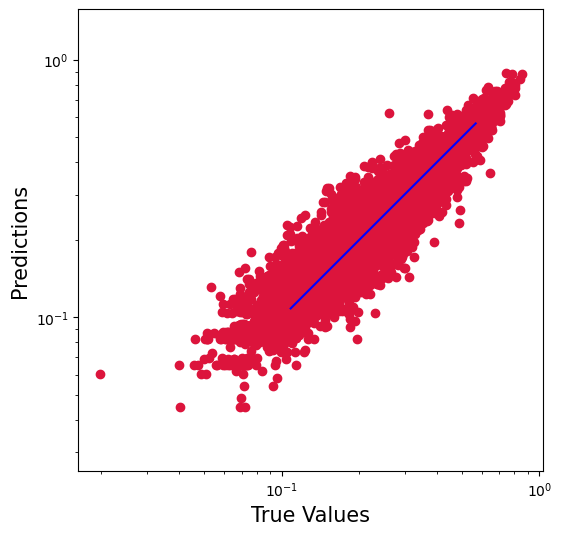

In [11]:
# plot graph
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_test[0:50]), max(y_test[0:50]))
p2 = min(min(y_pred_test[0:50]), min(y_test[0:50]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Random Forest Classification

In [11]:
df_new = pd.read_csv("hbd_model_data_classification.csv")
df_new.head()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,over_under_classification
0,0.0625,0.114583,0.0,0.0,0.229833,0.242702,0.377101,1.0,0
1,0.3750,0.098958,0.0,0.0,0.888889,0.181339,0.376605,1.0,0
2,0.0000,0.114583,0.0,0.0,0.243531,0.153615,0.373691,1.0,0
3,0.0625,0.114583,0.0,0.0,0.223744,0.212727,0.381423,1.0,0
4,0.1250,0.088542,0.0,0.0,0.292237,0.247779,0.408523,1.0,0


In [12]:
# train test split

# features
X = df_new.iloc[:,0:8]

# target
y = df_new["over_under_classification"]

# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 424)

In [13]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

# Define the model
clf = RandomForestClassifier(n_estimators = 100, random_state = 424)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Accuracy
from sklearn import metrics
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1 score:", metrics.f1_score(y_test, y_pred))
print("precision:", metrics.precision_score(y_test, y_pred))
print("recall:", metrics.recall_score(y_test, y_pred))

accuracy: 0.6011434444658572
f1 score: 0.5852094328278442
precision: 0.5919718880929855
recall: 0.5785997357992074
